In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

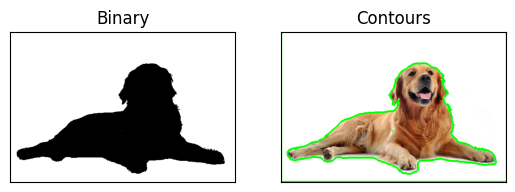

In [3]:
golden_img = cv2.imread('../day8/data/golden.jpg')
gray = cv2.cvtColor(golden_img, cv2.COLOR_BGR2GRAY)
# thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
ret, thresh = cv2.threshold(gray, 246, 255, cv2.THRESH_BINARY)
contours, h = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(golden_img, contours, -1, (0, 255, 0), 3)
images = [thresh, golden_img]
titles = ['Binary', 'Contours']
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
cap = cv2.VideoCapture("../day8/data/walking.mp4")

check, frame1 = cap.read()
check, frame2 = cap.read()

while cap.isOpened():
    if check:
        diff = cv2.absdiff(frame1, frame2)
        gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        ret, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
        dilated = cv2.dilate(thresh, None, iterations=3)
        contours, h = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(frame1, contours, -1, (0, 255, 0), 3)
        cv2.imshow("Contours", frame1)
        frame1 = frame2
        check, frame2 = cap.read()
    else:
        break
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [23]:
cap = cv2.VideoCapture("../day8/data/walking.mp4")

check, frame1 = cap.read()
check, frame2 = cap.read()
# cv2.namedWindow("Contours", cv2.WINDOW_NORMAL)
while cap.isOpened():
    if check:
        diff = cv2.absdiff(frame1, frame2)
        gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        ret, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
        dilated = cv2.dilate(thresh, None, iterations=5)
        contours, h = cv2.findContours(dilated, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            if cv2.contourArea(contour) > 1000 and cv2.contourArea(contour) < 5000:
                (x, y, w, h) = cv2.boundingRect(contour)
                cv2.rectangle(frame1, (x, y), (x+w, y+h), (0, 255, 0), 3)
        cv2.imshow("Contours", frame1)
        frame1 = frame2
        check, frame2 = cap.read()
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()